# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio



### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [29]:
#Importar base de dados
import pandas as pd

df = pd.read_csv('advertising.csv')
display(df)

#Tratamento dos dados
print(df.info())

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [30]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

<AxesSubplot:>

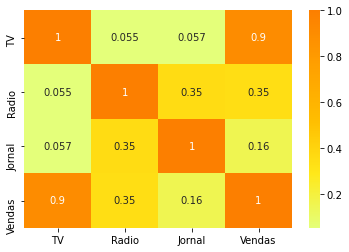

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#criar gráfico
sns.heatmap(df.corr(), cmap='Wistia', annot=True)



#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [32]:
#Separando nossa base de dados em x e y
y = df['Vendas'] #Quem eu quero prever

x = df[['TV','Radio','Jornal']] #Quem eu vou usar para fazer a previsão

#Separar os dados em treino e teste 
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criou a AI
modelo_regressaolinear = LinearRegression()
modelo_randomforest = RandomForestRegressor()

#Treinou a AI
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [34]:
#Treino é treino, jogo é jogo
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_randomforest = modelo_randomforest.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_randomforest))

0.9071151423684273
0.9642493525337708


#### Visualização Gráfica das Previsões

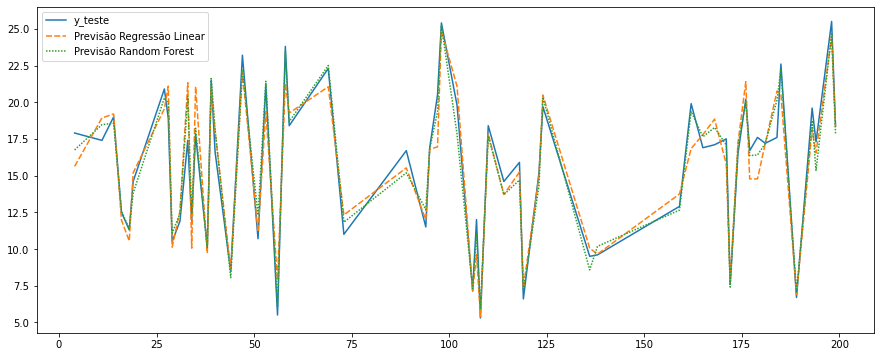

In [35]:
#O melhor modelo é o Random Forest
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão Regressão Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsão Random Forest'] = previsao_randomforest

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [38]:
#Importar nova tabela com as informações de propaganda em TV, Rádio e Jornal
#Passar nova tabela para o predict do modelo

novos = pd.read_csv('novos.csv')
display(novos)

previsao = modelo_randomforest.predict(novos)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.658  8.4   19.718]
